# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


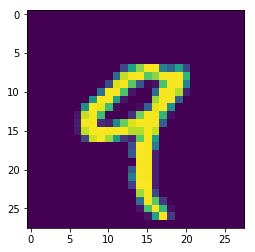

In [263]:
# display sample image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Convert values from 0 to 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# First 10 digits
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# one hot encoded
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [244]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(8, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(Convolution2D(32, 1, 1, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(12, 1, 1, activation='relu'))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

In [245]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_507 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_508 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_24 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_509 (Conv2D)          (None, 22, 22, 20)        2900      
_________________________________________________________________
batch_normalization_25 (Batc (None, 22, 22, 20)        80        
_________________________________________________________________
conv2d_510 (Conv2D)          (None, 22, 22, 8)         168       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 11, 11, 8)         0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [247]:
model.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 52s 859us/step - loss: 0.4442 - acc: 0.8980 - val_loss: 0.1128 - val_acc: 0.9814
Epoch 2/40
60000/60000 [==============================] - 41s 675us/step - loss: 0.1629 - acc: 0.9646 - val_loss: 0.0588 - val_acc: 0.9861
Epoch 3/40
60000/60000 [==============================] - 40s 659us/step - loss: 0.1115 - acc: 0.9745 - val_loss: 0.0539 - val_acc: 0.9862
Epoch 4/40
60000/60000 [==============================] - 40s 674us/step - loss: 0.0905 - acc: 0.9787 - val_loss: 0.0534 - val_acc: 0.9864
Epoch 5/40
60000/60000 [==============================] - 39s 658us/step - loss: 0.0728 - acc: 0.9821 - val_loss: 0.0381 - val_acc: 0.9896
Epoch 6/40
60000/60000 [==============================] - 41s 676us/step - loss: 0.0612 - acc: 0.9848 - val_loss: 0.0302 - val_acc: 0.9918
Epoch 7/40
60000/60000 [==============================] - 41s 677us/step - loss: 0.0528 - acc: 0.9866 - val_loss: 0.

In [248]:
# 25th epoch has validation accuracy = 99.40
model.fit(X_train, Y_train, batch_size=256, epochs=40, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 98us/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0229 - val_acc: 0.9933
Epoch 2/40
60000/60000 [==============================] - 6s 99us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0223 - val_acc: 0.9935
Epoch 3/40
60000/60000 [==============================] - 6s 108us/step - loss: 9.7861e-04 - acc: 0.9999 - val_loss: 0.0222 - val_acc: 0.9935
Epoch 4/40
60000/60000 [==============================] - 6s 100us/step - loss: 7.4304e-04 - acc: 1.0000 - val_loss: 0.0223 - val_acc: 0.9936
Epoch 5/40
60000/60000 [==============================] - 6s 97us/step - loss: 6.0926e-04 - acc: 0.9999 - val_loss: 0.0227 - val_acc: 0.9934
Epoch 6/40
60000/60000 [==============================] - 6s 97us/step - loss: 5.3075e-04 - acc: 1.0000 - val_loss: 0.0227 - val_acc: 0.9935
Epoch 7/40
60000/60000 [==============================] - 6s 96us/step - loss: 4.7782e-04 - acc: 1.0000 - val_

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [250]:
# (40+25)th epoch has 99.40% validation accuracy
print(score)

[0.02970153876168297, 0.9936]


In [0]:
# predict values for text data
y_pred = model.predict(X_test)

In [252]:
# compare first 9 from predicted and test values
print(y_pred[:9])
print(y_test[:9])

[[6.75780598e-10 2.71298802e-07 1.39598977e-09 1.91095348e-10
  1.03259772e-07 3.40746387e-09 3.04070658e-09 9.99999642e-01
  2.02968059e-10 4.90067720e-09]
 [2.18547065e-08 4.17418917e-08 9.99999762e-01 1.38804142e-08
  2.00079349e-08 2.34476172e-08 7.52411751e-08 3.92530497e-09
  2.19233858e-08 3.02772172e-08]
 [3.71034647e-10 9.99999881e-01 3.69734976e-09 8.81904327e-09
  5.22214343e-08 3.76366529e-08 2.12193925e-08 3.85018328e-09
  6.01081895e-09 3.27287242e-09]
 [9.99998331e-01 1.78058490e-09 1.01309681e-08 7.39696260e-09
  7.15251716e-08 3.64091264e-08 1.12754822e-06 3.71932373e-07
  1.05442957e-07 3.19092450e-08]
 [8.18637531e-08 2.92939930e-08 5.79352744e-08 1.22015198e-08
  9.99999166e-01 7.38467598e-09 1.93844674e-08 9.79498171e-09
  2.83049961e-09 6.09894869e-07]
 [1.87162480e-10 1.00000000e+00 2.91724950e-10 3.48844331e-09
  1.21130910e-08 6.25114582e-09 1.51988715e-08 2.44470488e-08
  2.10341931e-08 1.09869127e-08]
 [3.50019014e-10 2.43882766e-07 2.15680052e-09 2.22304924e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

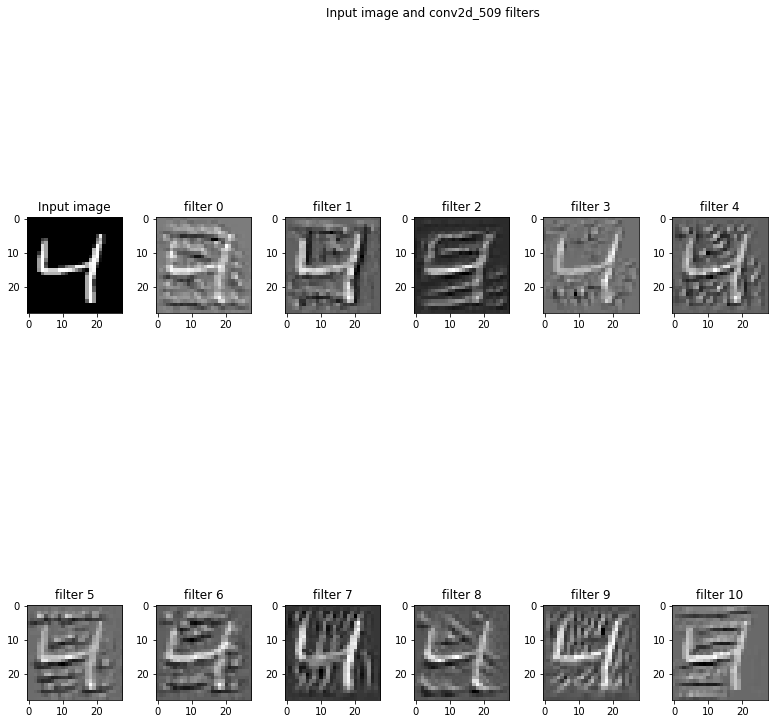

In [264]:
# how the kernel looks for 3rd convolutional layer

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_509'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()